# MC Simulation of Portfolio Returns

We use Monte Carlo when approximating portfolio returns due to its complex underlying distributions, we simulate a large number of simulations and using the samples we converge to find an exact solution

We assume daily returns are distributed by a Multivariate Gaussian Distribution
$$R_t \sim MVN(\mu, \Sigma)$$

The Cholesky Decomposition is used to determine Lower Triangular Matrix 
$$ L \in LL^\prime = \sigma $$

$$ R_t = \mu + LZ_t $$

$$ Z_t \sim N(0,I) $$
Where I is the identity matrix

$Z_t$ are the samples from a normal distribution

We use Cholesnky Decomposition to represent the daily returns.
We do this by taking a portion of uncorrelated sample data that we sample from normal distrbution and correlate them to the covariance matrix using the lower triangle matrix formula.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [2]:
# Importing data
## We want a covariance matrix of stocks with their start and end date
### We only select closing prices
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

## Stocklist

This MC simulation is to give us an approximation of the share prices of the firms that we are interested in for the next 300 days. We will sample from the normal distribution as the Malaysian stock market is relatively not volatile. This technique helps us understand the impact of risk and uncertainty when making a decision to buy or to hold.

In [18]:
#7160 =Pentamaster, 0166 = Inari , 0128= Frontken, 5292 = uwc
stocklist = ['7160', '0166', '0128', '5292']
# Use list comprehension to add .KL as Malaysian stocks require 
stocks = [stock + '.KL' for stock in stocklist]

In [19]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [20]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

In [21]:
print(meanReturns)

Symbols
7160.KL   -0.001212
0166.KL   -0.001139
0128.KL   -0.001888
5292.KL   -0.002117
dtype: float64


In [22]:
# Weights
weights = np.random.random(len(meanReturns))
## Weights have to sum to 1
weights /= np.sum(weights)

In [23]:
print(weights)
print(np.sum(weights))

[0.25387339 0.29839879 0.31801152 0.12971631]
1.0


# Monte Carlo Method


In [24]:
# Parameters
# Number of simulations
mc_sims = 200
# Timeframe in days
T = 200

In [25]:
#Create arrays
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
#Transpose
meanM = meanM.T

In [26]:
#Create arrays
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

In [27]:
#Initial Portfolio Value
InitialPortfolio = 10000

In [28]:
for m in range(0, mc_sims):
    #MC loops
    Z = np.random.normal(size=(T, len(weights)))
    #Lower Triangle(No of stocks by No of stocks)
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*InitialPortfolio

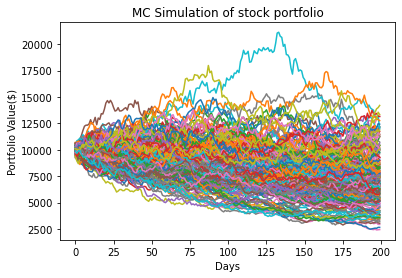

In [29]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title('MC Simulation of stock portfolio')
plt.show()